# **MAC0317/MAC5920**
## Introdução ao Processamento de Sinais Digitais
### Seção 1.4: Modelos de espaços vetoriais para sinais e imagens

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

## Definição 1.4.1: espaço vetorial

### $V$ é um espaço vetorial sobre $\mathbb{R}$ (ou $\mathbb{C}$) se:

- $\forall u,v,\in V\quad\quad u+v\in V$
- $\forall u\in V\quad\forall\alpha\in\mathbb{R}|\mathbb{C}\quad\quad \alpha u\in V$
- $\forall u,v,w\in V\quad\forall\alpha,\beta\in\mathbb{R}|\mathbb{C}:$
$$\begin{array}{l}u+v = v+u\quad\mbox{(comutatividade)}\\(u+v)+w = u+(v+w)\quad\mbox{(associatividade)}\\\exists \mathbf{0}\in V\ \mbox{tal que}\ u+\mathbf{0} = \mathbf{0}+u = u\quad (\mbox{el. neutro}\ +)\\1u = u\quad(\mbox{el. neutro}\ \cdot)\\\forall u\in V\ \exists w\in V\ \mbox{tal que}\  u+w = \mathbf{0}\quad (\mbox{inv. aditivo:}\ w=-u)\\(\alpha\beta)u = \alpha(\beta u)\quad\mbox{(associatividade)}\\(\alpha+\beta)u = \alpha u+\beta u\ \mbox{e}\ \alpha(u+v) = \alpha u+\alpha v\quad\mbox{(distributividade)}\end{array}$$

## Proposição 1.4.1 (exercício 1.12)

### Se $V$ é um espaço vetorial sobre $\mathbb{R}$ ou $\mathbb{C}$ então

> - $\mathbf{0}$ é único
> - $\forall u\in V\quad 0u = \mathbf{0}$
> - $\forall u\ \exists!w:\ u+w=\mathbf{0}$ (unicidade do inverso aditivo)

### Exemplo 1.1: $\mathbb{R}^N$ ou $\mathbb{C}^N$

$$\begin{array}{rcl}
x&=&(x_1,x_2,\ldots,x_n)\\
y&=&(y_1,y_2,\ldots,y_n)\\
x+y& = &(x_1+y_1,x_2+y_2,\ldots,x_n+y_n)\\
\alpha x& = &(\alpha x_1,\alpha x_2,\ldots,\alpha x_n)\\
\mathbf{0}&=&(0,0,\ldots,0)\\
-x&=&(-x_1,-x_2,\ldots,-x_n)
\end{array}$$

### Exemplo 1.2: $\mathbb{R}^{M\times N}$ ou $\mathbb{C}^{M\times N}$

$$\begin{array}{rclcrcl}
x&=&\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&x_{ij}&\cdots\\&\vdots&\ddots\end{array}\right]&&
y&=&\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&y_{ij}&\cdots\\&\vdots&\ddots\end{array}\right]\\
x+y& = &\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&x_{ij}+y_{ij}&\cdots\\&\vdots&\ddots\end{array}\right]&&
\alpha x& = &\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&\alpha x_{ij}&\cdots\\&\vdots&\ddots\end{array}\right]\\
\mathbf{0}&=&\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&0&\cdots\\&\vdots&\ddots\end{array}\right]&&
-x&=&\left[\begin{array}{ccc}\ddots&\vdots&\\\cdots&-x_{ij}&\cdots\\&\vdots&\ddots\end{array}\right]
\end{array}$$

### Exemplo 1.3: Sinais infinitos

$$\begin{array}{rcl}
x&=&(x_0,x_1,\ldots)\\
y&=&(y_0, y_1,\ldots)\\
x+y& = &(x_0+y_0,x_1+y_1,\ldots)\\
\alpha x& = &(\alpha x_0,\alpha x_1,\ldots)\\
\mathbf{0}&=&(0,0,\ldots)\\
-x&=&(-x_0,-x_1,\ldots)
\end{array}$$

### Exemplo 1.3 (cont): Sinais bi-infinitos

$$\begin{array}{rcl}
x&=&(\ldots,x_{-1},x_0,x_1,\ldots)\\
y&=&(\ldots,y_{-1},y_0, y_1,\ldots)\\
x+y& = &(\ldots,x_{-1}+y_{-1},x_0+y_0,x_1+y_1,\ldots)\\
\alpha x& = &(\ldots,\alpha x_{-1},\alpha x_0,\alpha x_1,\ldots)\\
\mathbf{0}&=&(\ldots,0,0,0,\ldots)\\
-x&=&(\ldots,-x_{-1},-x_0,-x_1,\ldots)
\end{array}$$

### Exemplo 1.4: Sinais limitados infinitos  ($L^\infty(\mathbb{N})$) ou bi-infinitos ($L^\infty(\mathbb{Z})$)

$$x\in L^\infty(\mathbb{N}|\mathbb{Z}) \iff \exists M_x: \forall k\in\mathbb{N}|\mathbb{Z}\quad|x_k|\le M_x$$

In [2]:
def sinal_limitado():
    # cria um sinal "suave" de N amostras a partir de M componentes aleatórias de baixa frequência
    # não se preocupe: esse código NÃO deve fazer sentido nessa altura do curso
    N, M = 1000, 20
    x = np.fft.ifft(np.concatenate((np.random.random((M))-0.5,np.zeros((N-M))))).real
    Mx = np.max(np.abs(x))
    K = Mx*np.ones((N//2))
    plt.figure(figsize=(15,5))
    plt.plot(x[0:N//2],label='x')
    plt.title(f'Sinal limitado ($M_x={Mx:.4f}$)')
    plt.plot(K,'-',color='orange')
    plt.plot(-K,'-',color='orange')
    plt.show()

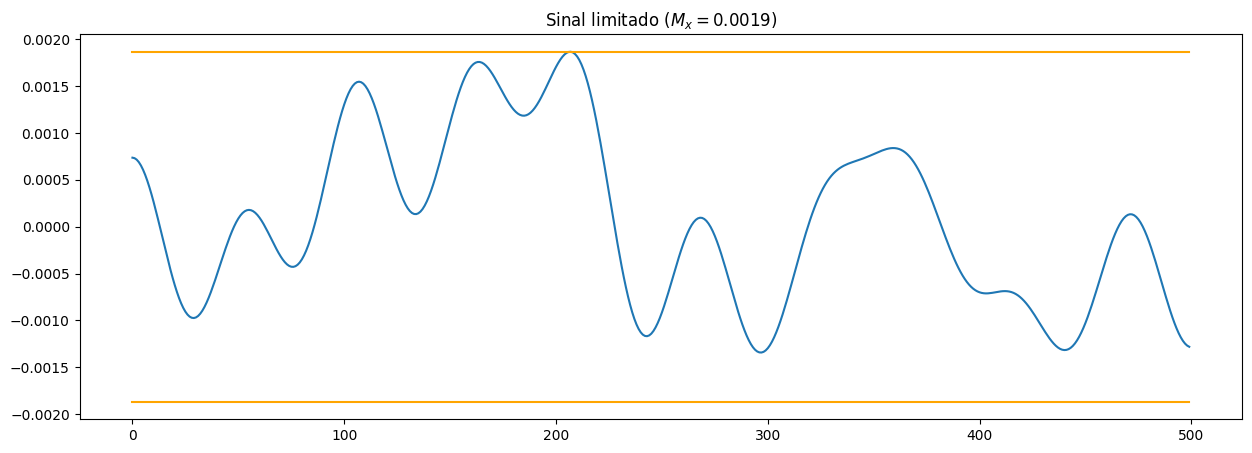

In [3]:
sinal_limitado()

Note que

$$x,y\in L^\infty(\mathbb{N}|\mathbb{Z}) \implies x+y\in L^\infty(\mathbb{N}|\mathbb{Z})$$

pois

$$|x_k+y_k| \le |x_k|+|y_k| \le M_x+M_y\quad\mbox{(desigualdade triangular)}$$

### Exemplo 1.5: Sinais de energia limitada infinitos  ($L^2(\mathbb{N})$) ou bi-infinitos ($L^2(\mathbb{Z})$)

$$x\in L^2(\mathbb{N}|\mathbb{Z}) \iff \sum_{k\in\mathbb{N}|\mathbb{Z}}|x_k|^2<\infty$$

In [4]:
def sinal_de_energia_limitada():
    N, M = 1000, 20
    x = np.fft.ifft(np.concatenate((np.random.random((M))-0.5,np.zeros((N-M))))).real[0:N//2]
    Mx = np.max(np.abs(x))
    K = np.ones((N//2))
    K[N//4:N//2] *= np.power(2,-np.linspace(0,5,N//4, dtype=float))
    x *= K
    plt.figure(figsize=(15,5))
    plt.plot(x,label='x')
    plt.title(f'Sinal de energia limitada')
    plt.plot(Mx*K,'-',color='orange')
    plt.plot(-Mx*K,'-',color='orange')
    plt.show()

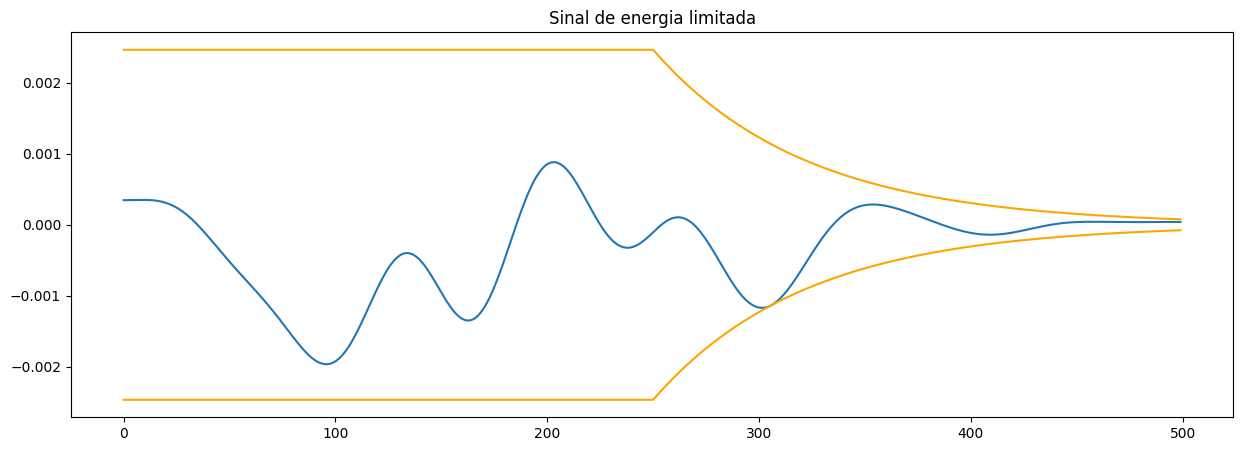

In [5]:
sinal_de_energia_limitada()

É possível provar (exercício 1.1) que

$$x,y\in L^2(\mathbb{N}|\mathbb{Z}) \implies x+y\in L^2(\mathbb{N}|\mathbb{Z})$$

### Observação: pularemos a seção 1.4.2 (espaços de funções)
### Quem tiver interesse pode ler em casa!